In [37]:
import pandas as pd
import numpy as np
from scipy.stats import ks_2samp, norm
from sklearn.metrics import make_scorer
from pylab import *
pd.set_option('display.max_columns', None)

In [38]:
df = pd.read_csv("C:/Users/joaov/OneDrive/Área de Trabalho/Python/Desafio Neurotech/datasets\credit_01/train/train.csv", parse_dates=['REF_DATE'])

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\joaov\AppData\Local\Temp\ipykernel_11296\1420633163.py:1: SyntaxWarning: invalid escape sequence '\c'
  df = pd.read_csv("C:/Users/joaov/OneDrive/Área de Trabalho/Python/Desafio Neurotech/datasets\credit_01/train/train.csv", parse_dates=['REF_DATE'])


In [39]:
df['SAFRA'] = df['REF_DATE'].dt.to_period('M').astype(str)

C:\Users\joaov\AppData\Local\Temp\ipykernel_11296\1594230138.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['SAFRA'] = df['REF_DATE'].dt.to_period('M').astype(str)


In [ ]:
safras = sorted(df['SAFRA'].unique())  # Ordenar as safras
resultados = []

for i in range(len(safras) - 1):
    safra_anterior = safras[i]
    safra_atual = safras[i + 1]
    
    # Filtrar as idades de cada safra
    idades_anterior = df[df['SAFRA'] == safra_anterior]['IDADE'].fillna(df['IDADE'].mean(numeric_only=True))
    idades_atual = df[df['SAFRA'] == safra_atual]['IDADE'].fillna(df['IDADE'].mean(numeric_only=True))
    
    # Teste KS para comparar distribuições
    ks_stat, p_value = ks_2samp(idades_atual, idades_anterior)
    
    # Guardar os resultados
    resultados.append({
        'Safra Atual': safra_atual,
        'Safra Anterior': safra_anterior,
        'KS Estatística': ks_stat*100,
        'P-valor': p_value
    })

# Criar DataFrame com os resultados
df_resultados = pd.DataFrame(resultados)
print(df_resultados)

  Safra Atual Safra Anterior  KS Estatística       P-valor
0     2017-02        2017-01        0.061169  2.219059e-23
1     2017-03        2017-02        0.063155  4.595515e-26
2     2017-04        2017-03        0.021965  1.666477e-03
3     2017-05        2017-04        0.005008  9.947363e-01
4     2017-06        2017-05        0.021476  2.316563e-03
5     2017-07        2017-06        0.017890  1.290128e-02
6     2017-08        2017-07        0.009093  4.867176e-01


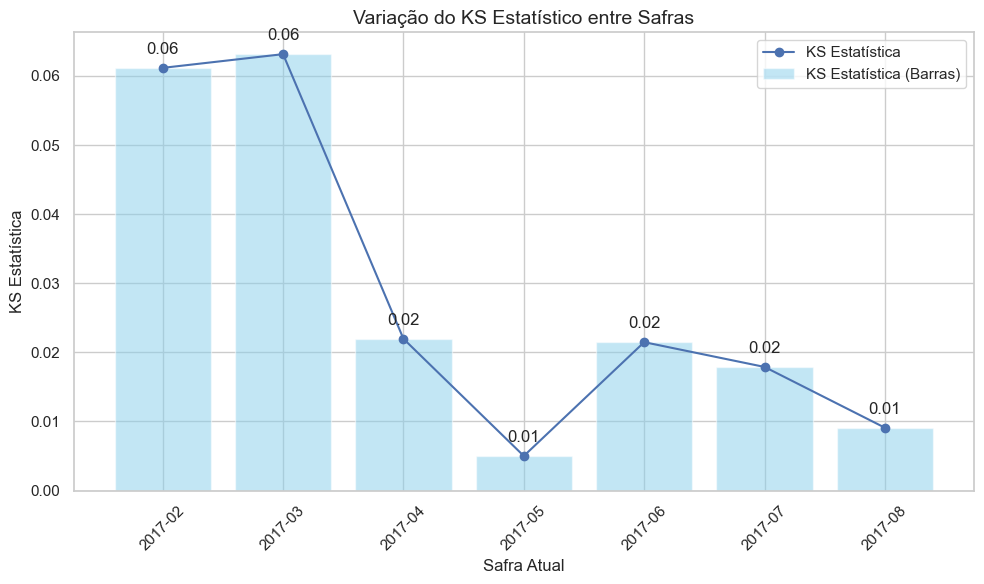

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

plt.plot(df_resultados['Safra Atual'], df_resultados['KS Estatística'], marker='o', label='KS Estatística', color='b')
plt.bar(df_resultados['Safra Atual'], df_resultados['KS Estatística'], alpha=0.5, color='skyblue', label='KS Estatística (Barras)')

# Adicionar rótulos e título
plt.title("Variação do KS Estatístico entre Safras", fontsize=14)
plt.xlabel("Safra Atual", fontsize=12)
plt.ylabel("KS Estatística", fontsize=12)
plt.xticks(rotation=45)
plt.legend()

x_arr = df_resultados['Safra Atual']
y_arr = df_resultados['KS Estatística']
for x,y in zip(x_arr,y_arr):

    label = "{:.2f}".format(y)

    plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center')

# Exibir o gráfico
plt.tight_layout()
plt.show()

In [100]:
def KS_variation(df, dt_col, ks_col):
    import pandas as pd
    import numpy as np
    from scipy.stats import ks_2samp, norm
    
    df['SAFRA'] = df[dt_col].dt.to_period('M').astype(str)
    
    safras = sorted(df['SAFRA'].unique())
    resultados = []
    
    for i in range(len(safras) - 1):
        safra_anterior = safras[i]
        safra_atual = safras[i + 1]
    
        # Filtrar as idades de cada safra
        var_anterior = df[df['SAFRA'] == safra_anterior][ks_col].fillna(df[ks_col].mean(numeric_only=True))
        var_atual = df[df['SAFRA'] == safra_atual][ks_col].fillna(df[ks_col].mean(numeric_only=True))
    
        # Teste KS para comparar distribuições
        ks_stat, p_value = ks_2samp(var_atual, var_anterior)
    
        # Guardar os resultados
        resultados.append({
            'Safra Atual': safra_atual,
            'Safra Anterior': safra_anterior,
            'KS': ks_stat,
            'P-valor': p_value
        })

    # Criar DataFrame com os resultados
    df_resultados = pd.DataFrame(resultados)

    import matplotlib.pyplot as plt
    import seaborn as sns
    import pandas as pd

    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))

    plt.plot(df_resultados['Safra Atual'], df_resultados['KS'], marker='o', label='KS', color='b')
    plt.bar(df_resultados['Safra Atual'], df_resultados['KS'], alpha=0.5, color='skyblue', label='KS (Barras)')

    # Adicionar rótulos e título
    plt.title("Variação do KS entre Safras", fontsize=14)
    plt.xlabel("Safra Atual", fontsize=12)
    plt.ylabel("KS", fontsize=12)
    plt.xticks(rotation=45)
    plt.legend()

    x_arr = df_resultados['Safra Atual']
    y_arr = df_resultados['KS']
    for x,y in zip(x_arr,y_arr):

        label = "{:.2f}".format(y)

        plt.annotate(label,
                    (x,y),
                    textcoords="offset points",
                    xytext=(0,10),
                    ha='center')

    # Exibir o gráfico
    plt.tight_layout()
    plt.show()

    return df_resultados

C:\Users\joaov\AppData\Local\Temp\ipykernel_11296\2927660647.py:6: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['SAFRA'] = df[dt_col].dt.to_period('M').astype(str)


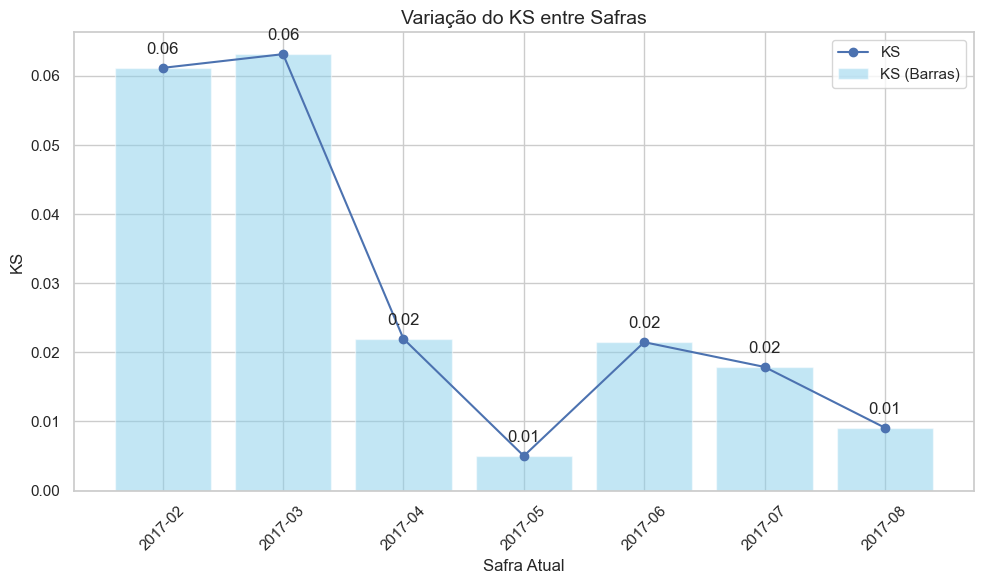

,Safra Atual,Safra Anterior,KS,P-valor
0,2017-02,2017-01,0.061169,2.219059e-23
1,2017-03,2017-02,0.063155,4.595515e-26
2,2017-04,2017-03,0.021965,1.666477e-03
3,2017-05,2017-04,0.005008,9.947363e-01
4,2017-06,2017-05,0.021476,2.316563e-03
5,2017-07,2017-06,0.017890,1.290128e-02
6,2017-08,2017-07,0.009093,4.867176e-01


In [101]:
KS_variation(df=df, dt_col='REF_DATE', ks_col='IDADE')